In [ ]:
from datasets import load_dataset

ds = load_dataset("James-A/Minecraft-16x-Dataset")

c:\Users\ASUS\torch-gpu\.venv\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
c:\Users\ASUS\torch-gpu\.venv\lib\site-packages\huggingface_hub\file_download.py:143: UserWarning: `huggingface_hub` cache-system uses symlinks by default to efficiently store duplicated files but your machine does not support them in C:\Users\ASUS\.cache\huggingface\hub\datasets--James-A--Minecraft-16x-Dataset. Caching files will still work but in a degraded version that might require more space on your disk. This warning can be disabled by setting the `HF_HUB_DISABLE_SYMLINKS_WARNING` environment variable. For more details, see https://huggingface.co/docs/huggingface_hub/how-to-cache#limitations.
To support symlinks on Windows, you either need to activate Developer Mode or to run Python as an administrator. In order to activate develop

MINECRAFT 16x DATASET VIEWER

Loading dataset from HuggingFace...

Dataset splits:
  train: 1366 samples
  validation: 70 samples
  test: 83 samples

DATASET STRUCTURE

Features: {'image': Image(mode=None, decode=True, id=None), 'texture_name': Value(dtype='string', id=None), 'texture_size': Value(dtype='string', id=None), 'type': Value(dtype='string', id=None), 'primary_colors': Value(dtype='string', id=None), 'secondary_colors': Value(dtype='string', id=None), 'pattern_description': Value(dtype='string', id=None), 'texture_style': Value(dtype='string', id=None), 'lighting_reflection': Value(dtype='string', id=None), 'symmetry': Value(dtype='string', id=None), 'tileable_direction': Value(dtype='string', id=None), 'visual_complexity': Value(dtype='string', id=None), 'illumination_effects': Value(dtype='string', id=None), 'usage_context': Value(dtype='string', id=None), 'functionality': Value(dtype='string', id=None), 'related_items_blocks': Value(dtype='string', id=None), 'mimicry_biom

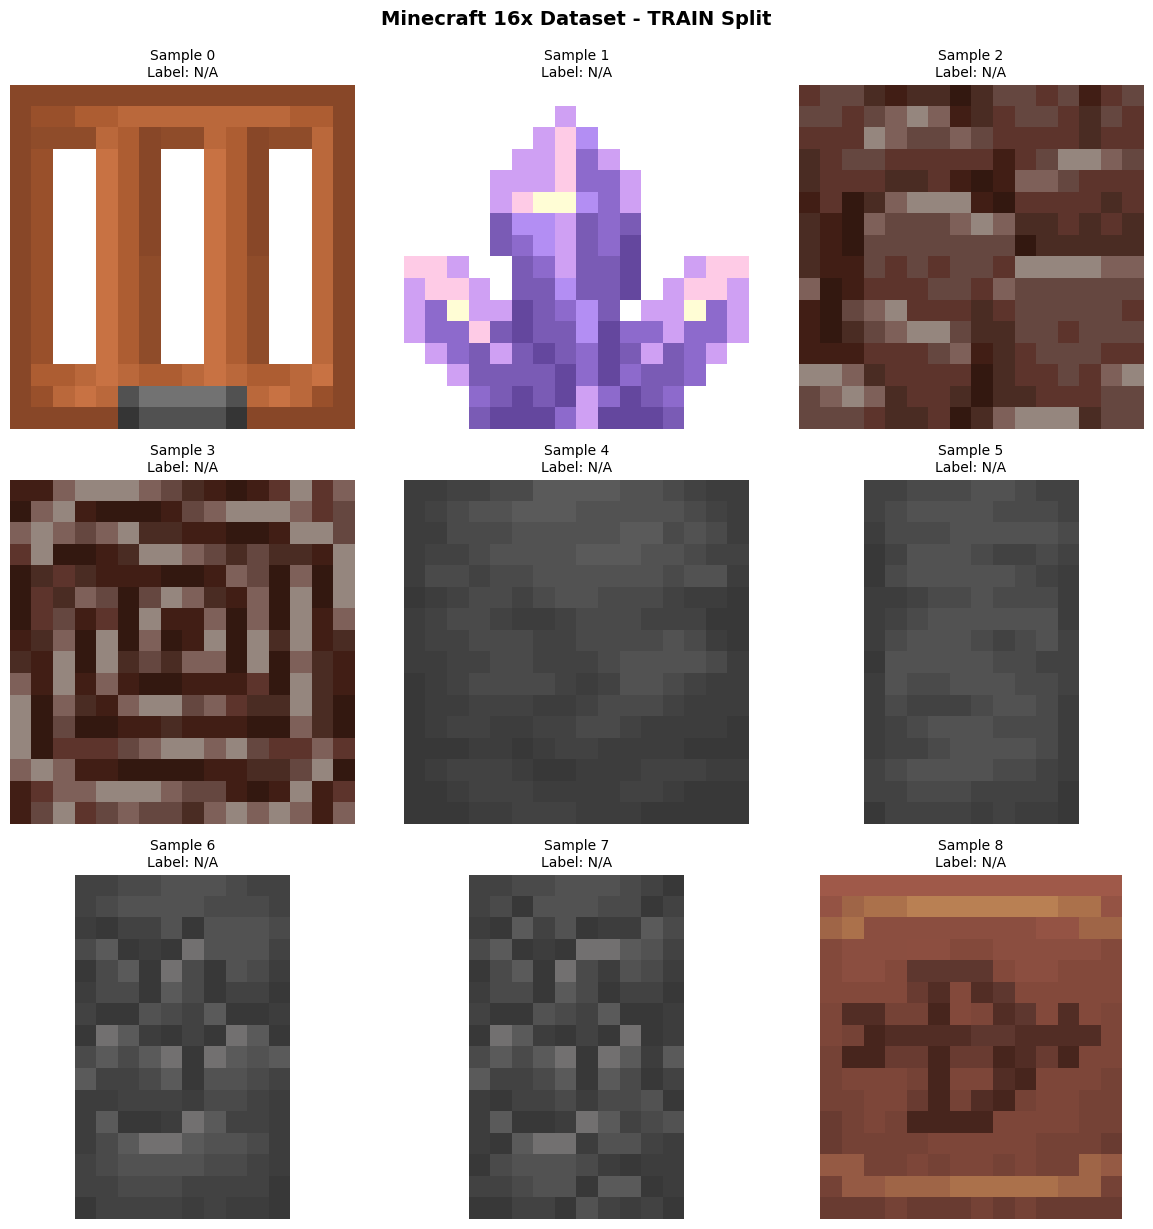

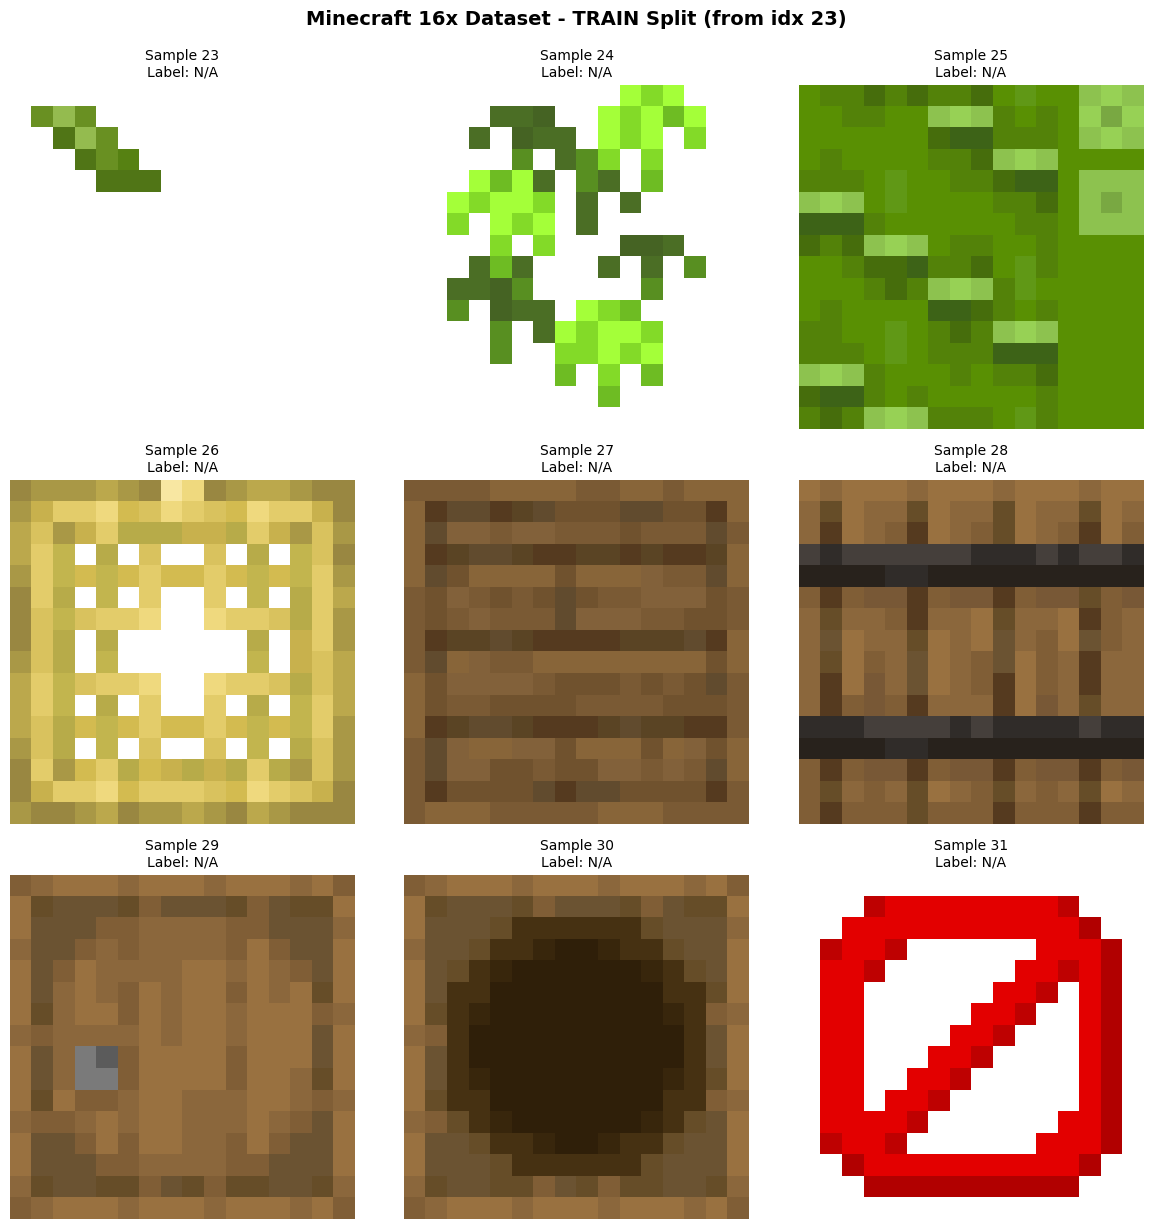


DATASET STATISTICS

Done!



In [2]:
from datasets import load_dataset
import matplotlib.pyplot as plt
from PIL import Image
import numpy as np

def view_dataset():
    """View the Minecraft 16x dataset with images and labels."""
    
    print("="*60)
    print("MINECRAFT 16x DATASET VIEWER")
    print("="*60)
    print("\nLoading dataset from HuggingFace...\n")
    
    # Load the dataset
    ds = load_dataset("James-A/Minecraft-16x-Dataset")
    
    # Print dataset info
    print("Dataset splits:")
    for split in ds.keys():
        print(f"  {split}: {len(ds[split])} samples")
    
    print("\n" + "="*60)
    print("DATASET STRUCTURE")
    print("="*60)
    
    # Show structure using train split
    train_ds = ds['train']
    print(f"\nFeatures: {train_ds.features}")
    print(f"\nFirst sample keys: {train_ds[0].keys()}")
    
    # Show first sample info
    first_sample = train_ds[0]
    print("\nFirst sample details:")
    for key, value in first_sample.items():
        if key == 'image':
            print(f"  {key}: PIL Image, size={value.size}, mode={value.mode}")
        else:
            print(f"  {key}: {value}")
    
    print("\n" + "="*60)
    print("VIEWING SAMPLES")
    print("="*60)
    
    # Ask user which split to view
    print("\nAvailable splits:")
    splits = list(ds.keys())
    for i, split in enumerate(splits):
        print(f"  {i+1}. {split} ({len(ds[split])} samples)")
    
    choice = input(f"\nSelect split to view (1-{len(splits)}) [default: 1]: ").strip()
    split_idx = int(choice) - 1 if choice.isdigit() else 0
    selected_split = splits[split_idx]
    
    # Ask how many samples to view
    num_samples = input("\nHow many samples to view? [default: 9]: ").strip()
    num_samples = int(num_samples) if num_samples.isdigit() else 9
    
    # Get samples
    dataset = ds[selected_split]
    num_samples = min(num_samples, len(dataset))
    
    # Calculate grid size
    cols = 3
    rows = (num_samples + cols - 1) // cols
    
    # Create figure
    fig, axes = plt.subplots(rows, cols, figsize=(12, 4*rows))
    if rows == 1:
        axes = axes.reshape(1, -1)
    axes = axes.flatten()
    
    print(f"\nDisplaying {num_samples} samples from '{selected_split}' split...")
    
    # Display samples
    for i in range(num_samples):
        sample = dataset[i]
        img = sample['image']
        label = sample.get('label', 'N/A')
        
        axes[i].imshow(img)
        axes[i].set_title(f"Sample {i}\nLabel: {label}", fontsize=10)
        axes[i].axis('off')
    
    # Hide unused subplots
    for i in range(num_samples, len(axes)):
        axes[i].axis('off')
    
    plt.tight_layout()
    plt.suptitle(f"Minecraft 16x Dataset - {selected_split.upper()} Split", 
                 fontsize=14, fontweight='bold', y=1.02)
    plt.show()
    
    # Ask if user wants to view more
    while True:
        again = input("\nView more samples? (y/n) [default: n]: ").strip().lower()
        if again == 'y':
            start_idx = input(f"Start from index (0-{len(dataset)-1}): ").strip()
            start_idx = int(start_idx) if start_idx.isdigit() else 0
            start_idx = max(0, min(start_idx, len(dataset)-1))
            
            num_samples = input("How many samples to view? [default: 9]: ").strip()
            num_samples = int(num_samples) if num_samples.isdigit() else 9
            num_samples = min(num_samples, len(dataset) - start_idx)
            
            # Calculate grid size
            cols = 3
            rows = (num_samples + cols - 1) // cols
            
            # Create figure
            fig, axes = plt.subplots(rows, cols, figsize=(12, 4*rows))
            if rows == 1:
                axes = axes.reshape(1, -1)
            axes = axes.flatten()
            
            # Display samples
            for i in range(num_samples):
                sample = dataset[start_idx + i]
                img = sample['image']
                label = sample.get('label', 'N/A')
                
                axes[i].imshow(img)
                axes[i].set_title(f"Sample {start_idx + i}\nLabel: {label}", fontsize=10)
                axes[i].axis('off')
            
            # Hide unused subplots
            for i in range(num_samples, len(axes)):
                axes[i].axis('off')
            
            plt.tight_layout()
            plt.suptitle(f"Minecraft 16x Dataset - {selected_split.upper()} Split (from idx {start_idx})", 
                         fontsize=14, fontweight='bold', y=1.02)
            plt.show()
        else:
            break
    
    print("\n" + "="*60)
    print("DATASET STATISTICS")
    print("="*60)
    
    # Show label distribution if labels exist
    if 'label' in dataset.features:
        print(f"\nLabel distribution in '{selected_split}' split:")
        labels = [sample['label'] for sample in dataset]
        unique_labels = sorted(set(labels))
        print(f"  Unique labels: {len(unique_labels)}")
        
        # Count each label
        from collections import Counter
        label_counts = Counter(labels)
        for label, count in sorted(label_counts.items(), key=lambda x: x[1], reverse=True)[:20]:
            print(f"  {label}: {count}")
        
        if len(label_counts) > 20:
            print(f"  ... and {len(label_counts) - 20} more labels")
    
    print("\n" + "="*60)
    print("Done!")
    print("="*60 + "\n")


def quick_view_samples(split='train', num_samples=9):
    """Quick function to view samples without prompts."""
    ds = load_dataset("James-A/Minecraft-16x-Dataset")
    dataset = ds[split]
    
    num_samples = min(num_samples, len(dataset))
    cols = 3
    rows = (num_samples + cols - 1) // cols
    
    fig, axes = plt.subplots(rows, cols, figsize=(12, 4*rows))
    if rows == 1:
        axes = axes.reshape(1, -1)
    axes = axes.flatten()
    
    for i in range(num_samples):
        sample = dataset[i]
        img = sample['image']
        label = sample.get('label', 'N/A')
        
        axes[i].imshow(img)
        axes[i].set_title(f"Sample {i}\nLabel: {label}", fontsize=10)
        axes[i].axis('off')
    
    for i in range(num_samples, len(axes)):
        axes[i].axis('off')
    
    plt.tight_layout()
    plt.suptitle(f"Minecraft 16x Dataset - {split.upper()}", 
                 fontsize=14, fontweight='bold', y=1.02)
    plt.show()


if __name__ == "__main__":
    # Interactive viewer
    view_dataset()
    
    # Or use quick view:
    # quick_view_samples(split='train', num_samples=12)